# NRCS CN model

The CN method is in common use and is examined here.
The curve number approach is based on a volume balance. 
The derivation is in the National Engineering Handbook Chapter 10.

The curve number is a solution to:

$$ 
Q = \frac{(P-0.2S)^2}{P+0.8S}
$$

where $Q$ is the cumulative runoff (integral of the hydrograph) in watershed depth (i.e. Discharge/Area), P is the cumulative rainfall (integral of the hyetograph). Drainage area is used to make units consistent; either divide Q by area to get a depth, or multiply P by area to get volume). S is the retention (like a storage term).

The curve number, $CN$, is simply a transformation of $S$

$$CN = \frac{1000}{S+10}$$

The $CN$ values for a large number of land coverages (hydrologic soil complex coverage number; or runoff curve number) were tabulated by the NRCS many years ago. 
It is of note that the method was intended for agricultural use. 

Equations similar in structure to the NRCS equations above can be constructed by assuming the watershed operates as a linear reservoir and such an analysis provides some understanding of $CN$ (as other than just a tabulation). When viewed in such a fashion the $CN$ is like a response or residence time parameter ($\alpha$ in our linear reservoir model above) and represents how long in dimensionless time it takes the watershed to reach an equilibrium storage condition where the precipitation that enters leaves. 
Large values (90+) are "fast" responding watersheds, small values (50-ish) are "slow" responding watersheds.

The figure below is the typical graphical representation from NRCS sources.

![](CNchart.png)

Now lets demonstrate that structurally the $CN$ model is explainable as a particular interpretation of a linear reservoir model.

Start with linear reservoir model, but include some abstractions.  Show in cumulative space to get CN-type model.

## CN as a linear reservoir model

Assume a watershed can be represented as a linear reservoir, where the discharge is proportional to accumulated storage. 
Using the $CN$ variable names and definitions it is possible to construct a discharge function that is a decaying exponential. 
The decay rate conveys similar information as the curve number, that is it relates how much cumulative precipitation must occur before the retention is satisfied and the ratio of actual to potential retention becomes one.

First the variable names associated with the Figure below and their definitions from chapter 10, NEH.

![](CNReservoir.png)

- $I_a$ is the initial abstraction - it represents input rainfall that never appears as runoff and is removed at the beginning of an event.
- $F_a$ is the watershed retention - it represents the depth of water retained on the watershed after runoff begins.  In our previous model it plays the same role as $\bar h$
- $S$ is the potential watershed retention after runoff begins - it represents the maximum possible depth of of water retained on the watershed if the rain goes on forever.
- $Q$ is the actual runoff depth.
- $P$ is the actual rainfall depth.


The figure above is a sketch of a watershed as a reservoir. 
The area is $A$, precipitation rate is $i$, the initial abstraction is $I_a$ and the actual retention (accumulated depth on the watershed in excess of $I_a$) is $F_a$. 
The discharge in volume units is $qA$.
If one writes a mass balance on the watershed in terms of $F_a$, **ASSUMING** the initial abstraction is already satisfied (as in the NRCS definition of $F_a$ above), then the resulting equation is

$$A~\frac{d F_a}{dt} = A(i -q) $$

Normalizing by the constant watershed area

$$~\frac{d F_a}{dt} = (i -q) $$

The units of precipitation and discharge are now $\frac{L}{T}$ (depth per unit time). 
The units of **accumulated** depth are length (thus the time derivative is L/T). If we **ASSUME** a linear response, that is the specific discharge is proportional to accumulated depth ($F_a$) we can postulate a model for the discharge as 

$$q = \frac{1}{\alpha}F_a $$

The term $\alpha$ is some non-zero constant that reflects the discharge from the watershed as some proportion of accumulated depth.

Now substitute into the mass balance and solve for $F_a$ and **ASSUME** that precipitation rate is a constant value one can arrive at:

$$q = \frac{1}{\alpha}F_a = i(1-e^{-\frac{t}{\alpha}})$$

In this formula time begins when $I_a$ is satisfied.

Now examine the definitions of $P$ and $Q$ (or $P_e$) in the NRCS documents. By defintion:

$$Q = \int_{lb}^{ub}q(\tau)d\tau = it+i \alpha  e^{-\frac{t}{\alpha}} -i \alpha$$

$$P = it + I_a + F_a$$

Now construct a plot (simulation) that plots $Q$ versus $P$ for different values of alpha (plus an equal value line) we have

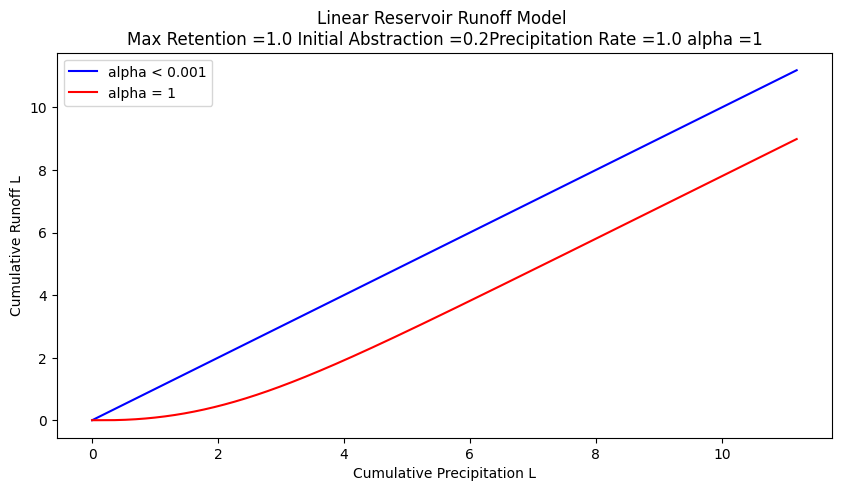

In [1]:
# structural simulation need units for practical applications
import math
howmany = 1000
alpha = 1 #watershed discharge conversion constant
peein = 1.0
abstraction = 0.2
retention = 0.0
maxretention = 1.0

def qfunc(inflow,time,alpha):
    qfunc = inflow*(1.0-math.exp(-time/alpha))
    return(qfunc)

qnow = [0 for i in range(howmany)]
pnow = [0 for i in range(howmany)]
rnow = [0 for i in range(howmany)]
time = [0 for i in range(howmany)]
deltat = 0.01 # time step value
# time zero values
qnow[0]=peein*time[0]+peein*alpha*math.exp(-time[0]/alpha)-peein*alpha
for itime in range(1,howmany):
    time[itime] = deltat+time[itime-1]
    qnow[itime]=peein*time[itime]+peein*alpha*math.exp(-time[itime]/alpha)-peein*alpha
    rnow[itime]=alpha*qfunc(peein,time[itime],alpha)
    pnow[itime]=peein*time[itime]+abstraction+rnow[itime]



import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.plot(pnow, pnow, color ='blue') 
matplotlib.pyplot.plot(pnow, qnow, color ='red') 
#matplotlib.pyplot.plot(time, dsnow, color ='green') 
matplotlib.pyplot.xlabel("Cumulative Precipitation L") 
matplotlib.pyplot.ylabel("Cumulative Runoff L") 
matplotlib.pyplot.title("Linear Reservoir Runoff Model \n"+"Max Retention ="+str(maxretention)+
                        " Initial Abstraction ="+str(abstraction)+"Precipitation Rate ="+str(peein)+" alpha ="+str(alpha) )
matplotlib.pyplot.legend(["alpha < 0.001","alpha = "+str(alpha),"Delta Storage"])
matplotlib.pyplot.show() 

Now if we compare the appearance of the simulation figure to the NRCS chart we can observe that the charts convey the same kinds of curves, specifically the amount of precipitation accumulation required to produce constant runoff, as well as the conversion ratio between observed cumulative precipitation and observed cumulative runoff. In the case of the linear-reservoir model, the information is conveyed by the parameter $\alpha$ which dimensionally is a residence time, while the curve number $CN$ plays a similar role in the NRCS methodology.

A bit more examination and we can conclude:

1. $\alpha = \frac{100-CN}{10}$ will generate identical looking curves to the NRCS charts
2. $i\alpha = S$ thus the product of the residence time and intensity is the maximum potential retention.
3. Runoff starts (in the time domain) at $t_r = I_a = \frac{\alpha}{5}$

So lets modify the script to reflect this conjecture

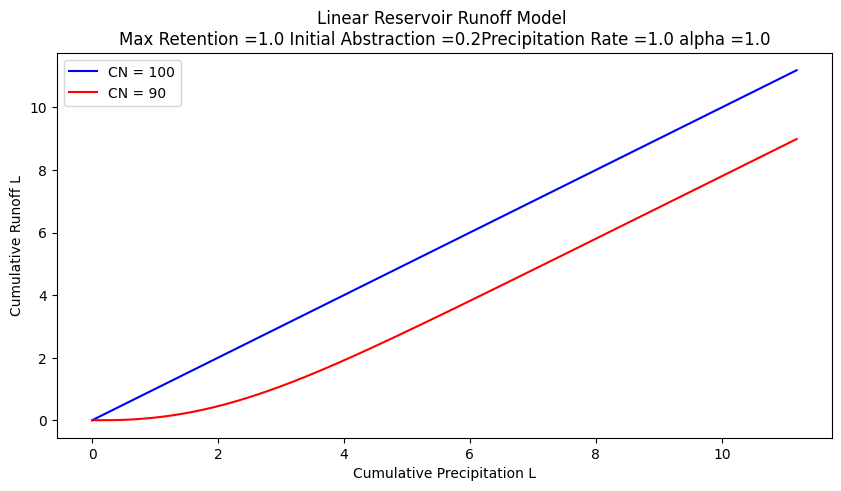

In [2]:
# structural simulation need units for practical applications
import math
howmany = 1000
CN = 90
alpha = (100-CN)/10 #watershed discharge conversion constant
peein = 1.0
abstraction = 0.2
retention = 0.0
maxretention = 1.0

def qfunc(inflow,time,alpha):
    qfunc = inflow*(1.0-math.exp(-time/alpha))
    return(qfunc)

qnow = [0 for i in range(howmany)]
pnow = [0 for i in range(howmany)]
rnow = [0 for i in range(howmany)]
time = [0 for i in range(howmany)]
deltat = 0.01 # time step value
# time zero values
qnow[0]=peein*time[0]+peein*alpha*math.exp(-time[0]/alpha)-peein*alpha
for itime in range(1,howmany):
    time[itime] = deltat+time[itime-1]
    qnow[itime]=peein*time[itime]+peein*alpha*math.exp(-time[itime]/alpha)-peein*alpha
    rnow[itime]=alpha*qfunc(peein,time[itime],alpha)
    pnow[itime]=peein*time[itime]+abstraction+rnow[itime]



import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.plot(pnow, pnow, color ='blue') 
matplotlib.pyplot.plot(pnow, qnow, color ='red') 
#matplotlib.pyplot.plot(time, dsnow, color ='green') 
matplotlib.pyplot.xlabel("Cumulative Precipitation L") 
matplotlib.pyplot.ylabel("Cumulative Runoff L") 
matplotlib.pyplot.title("Linear Reservoir Runoff Model \n"+"Max Retention ="+str(maxretention)+
                        " Initial Abstraction ="+str(abstraction)+"Precipitation Rate ="+str(peein)+" alpha ="+str(alpha) )
matplotlib.pyplot.legend(["CN = 100","CN = "+str(CN),"Delta Storage"])
matplotlib.pyplot.show() 

so in practice we don't use the $CN$ model as a linear reservoir. It is strictly treated as a runoff generation procedure - its useful and practical, but is built on limited assumptions.

The $CN$ values are tabulated in many locations including:

- [WSS](https://websoilsurvey.sc.egov.usda.gov/App/HomePage.htm)  After an AOI is delineated, the soils property tab will return CN values associated with each soil texture.
- [NEH Chapter 9](https://directives.sc.egov.usda.gov/OpenNonWebContent.aspx?content=17758.wba) Tables of CN for different soil textures
- [Texas HDM](http://onlinemanuals.txdot.gov/txdotmanuals/hyd/hydrograph_method.htm#JSGEGKGG) Similar to above, with some probability and geographic corrections.

:::{note}
The $CN$ method using composite curve numbers is one of the recomended methods to consider in the Hardin Creek design/analysis project.  While by no means the bestest, its not bad for this application and relatively easy to parameterize and is built-in to HEC-HMS the design/analysis tool you will use.
:::

## HEC-HMS Introduction

- Install HEC-HMS
   - Verify Install when GUI loads
- Build a minimal model
   - Project Create
     - Basin Model
     - Meteorological Model
     - Control Specifications
   - Simulation Run Manager
     - Run Simulation
- Examine the output

### HEC-HMS Project

The `project` is the structure to contain all the files related to some particular project.  Think of it as a model directory.

To create a new project simply select NEW from the file menu :

![](hms-newproject.png)

and then select units (SI or Imperial) and name the project:

![](hms-projectname.png)

### HEC-HMS Minimal Model

A minimal model consists of 

- Basin Model
- Meteorological Model
- Control Specifications

#### Basin Model Specification

For this example we will use the Hardin Creek basin which is about 17 square miles.  For the example we will neglect the reservoirs and model the whole thing as a singe watershed.

To create a basin model, select Components from the menu then Basin Manager 

![](hms-basinmanager.png)

As with most HMS creator dialogs, you next name the basin.

![](hms-basinname.png)

#### Meterological Model Specification

To create a meterological model, select Components from the menu then Meterological Model Manager 

![](hms-metmodel.png)

As with most HMS creator dialogs, you next name the model.

![](hms-metmodelname.png)

#### Control Model Specification

The last component is the control specification model (with dates and times for the simulation period).  To create a control model, select Components from the menu then Control Model Manager 

![](hms-controlspecs.png)

Then next name the model.

![](hms-controlspecsname.png)

#### Parameterizing the models

Now that the pieces are built, we need to supply watershed and rainfall characteristics to the components for a useable model.  First we will simulate the entire watershed as a single basin, with CN=98, and all other watershed-based model components disabled (i.e. None)

First build the single **basin**

![](hms-subbasinselect.png)

Then supply the inputs, first area and the CN model.  Disable all the remaining methods (choose --None--)

![](hms-nwebasins1.png)

Then the CN parameters (same as in class)

![](hms-nwebasins2.png)

Then supply the **meterological** model inputs, for the example we will use an SCS design storm, in HMS its called "hypothetical" storm.

![](hms-hypothetical1.png)

Then be sure the correct basins are attached to the precipitation input signal

![](hms-hypothetical2.png)

Next select the storm itself and supply model inputs

![](hms-hypothetical3.png)

Now select the **control** specifications and provide needed time values (must be calendar/clock time, HMS does not easily handle elapsed times - you can use fake dates as needed)

![](hms-control1.png)

Now one can select simulation run builder

![](hms-sim1.png)

![](hms-sim2.png)

![](hms-sim3.png)

![](hms-sim4.png)

Once these are complete select Finish and the run manager is loaded, next select the particular run to active the compute engine

![](hms-sim5.png)

At this point it should be ready, this is a good time to save the project, then reload the saved project from the file menu. Now attempt to run the simulation by selecting the exploding raindrop!

![](hms-sim6.png)

With some luck it works like

![](hms-sim7.png)

With a suseccful run we can examine various output features - to complete this notebook section we will just use a default chart of runoff from the watershed.  Select the Results/Element_Graph to get:

![](hms-sim8.png)

There are tutorials and examples in the User Manual for the software.


## References

1. USDA National Engineering Handbook, Chapters 4,5, and 10.

2. [Cleveland, T. G. (2017) *Engineering Hydrology Notes to Accompany CE 3354 (Rational Equation, HEC-HMS)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2017/Lecture09.pdf)

3. Gupta pp. 711-724

4. [HEC-HMS User Manual 3.5](http://54.243.252.9/ce-3354-webroot/3-Readings/HEC-HMS-Documentation/HEC-HMS_Users_Manual_3.5.pdf)

5. [HEC-HMS Applications Guide](http://54.243.252.9/ce-3354-webroot/3-Readings/HEC-HMS-Documentation/HEC-HMS_Applications_Guide_March2008.pdf)

6. [HEC_HMS Quick Start Guide 3.5](http://54.243.252.9/ce-3354-webroot/3-Readings/HEC-HMS-Documentation/HEC-HMS_QuickStart_Guide_3.5.pdf)

7. [HEC-HMS Release Notes 3.5](http://54.243.252.9/ce-3354-webroot/3-Readings/HEC-HMS-Documentation/HEC-HMS_Release_Notes_3.5.pdf)

8. [HEC-HMS Technical Reference Manual](http://54.243.252.9/ce-3354-webroot/3-Readings/HEC-HMS-Documentation/HEC-HMS_TechnicalReferenceManual_(CPD-74B).pdf)

9. [NRCS TP-149 CN estimation](http://54.243.252.9/ce-3354-webroot/3-Readings/NRCS-CN-TP149/methodforestimat149kent.pdf)

10. [Cleveland, T. G. (2022) *Engineering Hydrology Notes to Accompany CE 3354 (Introduction to HEC-HMS)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/ce3354book/lessons/lesson06/Lesson09ug.pdf)